In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


import mglearn
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()    
# 한글폰트가 기본적으로 없다.  그래서 따로 등록해서 사용하면 됨
font_name
#(c\windows\fonts  가 기본폰트)

plt.rc('font', family=font_name)

# - 마이너스 표시도 깨진다.
mpl.rcParams["axes.unicode_minus"]=False    #마이너스를 문자로 쓰지 않고 숫자로 쓰겠다. 라는 뜻


import mglearn

from sklearn.model_selection import train_test_split

C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Decision Tree
    의사결정 나무 알고리즘
    
    20고개 게임을 생각해볼 수 있다. 
    
            날개가 있냐 
              /   \
      날수 있냐    지느러미가 있냐
        /  \              /  \
    독수리  펭귄       돌고래  곰
    
    
    이런식으로 계속 진행해나가는 방법을 의미한다. 
    
    
### Graphviz
    일반적인그래프와는 달리 특수한 목적에 사용하는 그래프이다.
    
    밑에 사이트에서 설치해줘야한다.
    - 설치
        http://www.graphviz.org
        2.38 Stable Release

        graphviz-2.38.msi

        실행 후 All next 
    
    - python 설치
    
        pip install graphviz

### 복잡도 제어 : prunning
    - 사전 가지치기
    - 사후 가지치기
    - sklearn에서는 사후 가지치기만 지원

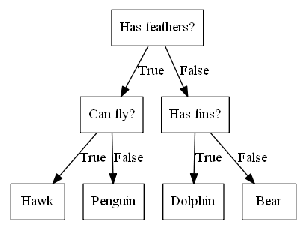

In [2]:
# 운영체제 관련된걸 사용하기 위함
import os

# 환경 변수경로에 추가
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
#os.pathsep : 지금까지의 설정뒤에 세미콜론을 찍어주기 위한 속성

#설치확인 그림
mglearn.plots.plot_animal_tree()

의사결정 샘플 중 mglearn에서 제공하는게 있다.

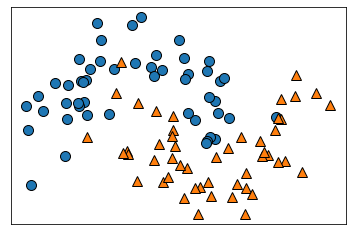

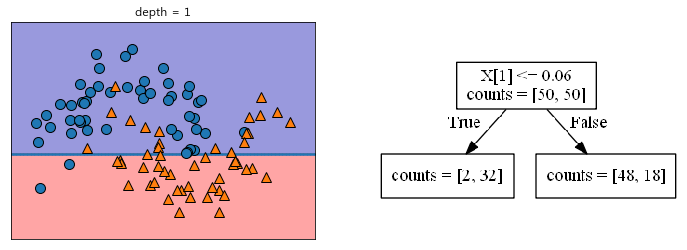

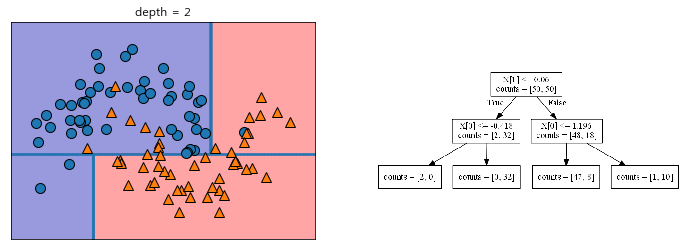

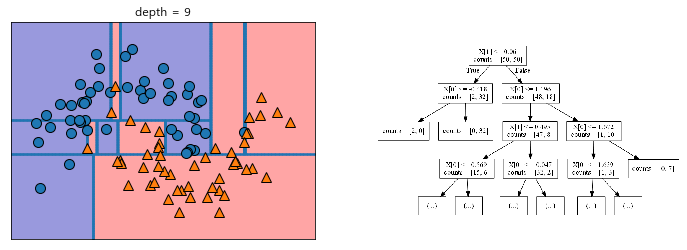

In [3]:
# 샘플 
# 의사결정이 어떻게 진행되는지 그래프로 나타내준다. 
mglearn.plots.plot_tree_progressive()


    절때 직선으로 분류할 수 없다.
    우리가 하던 방식대로 하면 곡선으로 나온다던지 그랬을 것. 쉽지 않다.
    그래서 의사결정트리 처럼 단계별로 구분해준다면 쩔지 않을까
    
    depth = 1 : 첫번째 질문
        입력된 값 중 0.06기준으로 맞냐 틀리냐
        
    depth = 2 : 두번째 질문
        ..
        ..
        ..
        
    이렇게 총9 번 정도를 해서 복잡한 관계를 분류할 수 있다. 
    이런 알고리즘이 의사결정트리 알고리즘
    
    
    그런데 이런건 깊게 훈련하면 훈련용 데이터는 정답률이 너무 높아진다. 거의 100%로 이루어짐
    과대적합이 되는데
    복잡도를 그래서 제어 해야한다.
    
    이 알고리즘의 제어는 '어디까지 가지를 쳐야하나' 라는 것을 잘 판단해야한다.
    적당하게 가지를 치는게 아주 중요 = Prunning (가지치기)
    
    그래서 이걸 찾는 것이 이 알고리즘의 큰 관건
    
### 복잡도 제어 : prunning
    가지치기
        - 사전 가지치기 : 미리 훈련전 depth 몇까지 할건지
            성능이 좋겠지
        - 사후 가지치기 : 훈련이 끝난 후 가지를 친다.
            성능 부분에선 떨어진다. 
            다만 내가 보고 나서 정확히 더 구분할 수 있다는것에 장점이 있다.
        
    하지만 sklearn에서는 사후 가지치기만 지원한다.
    그래서 사전가지치기는 할 수 없다. 
    이 경우에선 R은 잘 되어있다. 만약 의사결정트리만 쓰는 경우면 R을 쓰는 것도 방법이다.
    
        
    

In [6]:
# 샘플 : 유방암 데이터 셋
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


# 훈련용 테스트용 구분
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, 
                                                    random_state=42)

In [8]:
# 알고리즘 선택  : DecisionTreeClassifier
# 여기서 Hyper param을 정할 수 있다. (가지)
# random_state도 지정해줄 수 있음.
# max_depth : 가지 수 - 이것으로 성능이 갈린다.
tree = DecisionTreeClassifier(random_state=0, max_depth = 4)


# 훈련
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

    다른 알고리즘에 비해서 조정할 값들이 많다.
    성능 조절할 수 있는 방법들이니 찾아보면 된다.

In [9]:
print("훈련 정확도 : ", tree.score(X_train, y_train))

훈련 정확도 :  0.9882629107981221


    가지만 높이면 충분히 100%까지 나온다
    다만 이렇게 하면 훈련용만 완벽해지므로 과대적합이 되어 의미가 없어진다.
    중요한건 테스트 정확도이다.

In [10]:
print("테스트 정확도 : ", tree.score(X_test, y_test))

테스트 정확도 :  0.951048951048951


    약간 낮지만 이 정도면 아주 준수하다.
    그 전에 했던 것들은 이정도 정확도는 나오지 않았다. 

In [14]:
# 이 결과를 그래프로 해보자
# 얼마나 graphviz가 유명했으면 sklearn에도 있을까
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="data/tree.dot", class_names=["음성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True) 
# graphviz 형식으로 저장하기
# 데이터
# out_file : 저장위치 (dot이 graphviz의 파일 형식이다.)
# class : 네임으로 할것
# feature : ?
# impurity : 불순물 제거
# 

